# Global Cybersecurity Threats Analysis (2015-2024)

## 📋 Table of Contents

1. [Project Overview](#project-overview)
2. [Research Question](#research-question)
3. [Dataset Information](#dataset-information)
4. [Step 0: Import Libraries](#step-0-import-libraries)
5. [Step 1: Load Dataset](#step-1-load-dataset)
6. [Step 2: Inspect Dataset](#step-2-inspect-dataset)
7. [Step 3: Data Cleaning & Preparation](#step-3-data-cleaning--preparation)
8. [Step 4: Exploratory Data Analysis (EDA)](#step-4-exploratory-data-analysis-eda)
   - [4A: Summary Statistics](#4a-summary-statistics)
   - [4B: Visualizing Distributions](#4b-visualizing-distributions)
   - [4C: Correlation Analysis](#4c-correlation-analysis)
9. [Step 5: Trend Analysis Over Years](#step-5-trend-analysis-over-years)
10. [Step 6: Advanced Analysis & Insights](#step-6-advanced-analysis--insights)
11. [Step 7: Conclusions & Recommendations](#step-7-conclusions--recommendations)

---

## Project Overview
This comprehensive analysis examines cybersecurity threat patterns, trends, and impacts across different industries and countries from 2015 to 2024. The analysis provides actionable insights for cybersecurity professionals, risk managers, and organizational leaders.

## 🔍 Research Question

**Primary Research Question:**
> "What are the key patterns, trends, and impacts of cybersecurity threats from 2015-2024, and how do they vary across industries, attack types, and geographical regions?"

**Sub-Research Questions:**
1. **Temporal Analysis**: How have cybersecurity threats evolved over the 10-year period (2015-2024)?
2. **Industry Targeting**: Which industries are most vulnerable to cyber attacks and why?
3. **Attack Patterns**: What are the most common attack types and their characteristics?
4. **Financial Impact**: What is the relationship between attack types and financial losses?
5. **Geographic Distribution**: How do attack sources and targets vary by region?
6. **Resolution Efficiency**: What factors influence incident resolution times?
7. **User Impact**: How do different attack types affect the number of users?

**Expected Outcomes:**
- Identification of high-risk industries and attack vectors
- Understanding of temporal trends in cybersecurity threats
- Insights for strategic security planning and resource allocation
- Data-driven recommendations for threat mitigation strategies

## Dataset Information
- **Source**: Global Cybersecurity Threats Dataset
- **Time Period**: 2015-2024
- **Records**: 3,000 cybersecurity incidents
- **Features**: 10 columns covering attack characteristics, targets, impacts, and responses

---

## Step 0: Import Libraries

**Purpose**: Import essential Python libraries for data manipulation, analysis, and visualization.

**Why this step matters**: 
- **Pandas**: Essential for data manipulation, cleaning, and analysis
- **NumPy**: Provides numerical computing capabilities and array operations
- **Matplotlib & Seaborn**: Enable comprehensive data visualization and statistical plotting
- **Warnings**: Suppress non-critical warnings for cleaner output

In [ ]:
# Import essential libraries
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns 
import warnings

# Interactive visualizations
try:
    import plotly.express as px
    import plotly.graph_objects as go
    from plotly.subplots import make_subplots
    import plotly.offline as pyo
    HAS_PLOTLY = True
    print("✅ Plotly imported successfully - Interactive visualizations enabled!")
except ImportError:
    HAS_PLOTLY = False
    print("⚠️  Plotly not available - Using static visualizations only")

# Configure display settings
pd.set_option('display.max_columns', None)
pd.set_option('display.width', None)
warnings.filterwarnings('ignore')

# Set professional plot styling
plt.style.use('default')
sns.set_style("whitegrid")
sns.set_palette("husl")

# Set figure parameters for better quality
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 10
plt.rcParams['axes.titlesize'] = 14
plt.rcParams['axes.labelsize'] = 12
plt.rcParams['xtick.labelsize'] = 10
plt.rcParams['ytick.labelsize'] = 10
plt.rcParams['legend.fontsize'] = 10

print("✅ Core libraries imported successfully!")
print("📊 Ready for cybersecurity data analysis")
print(f"🎨 Interactive visualizations: {'Enabled' if HAS_PLOTLY else 'Disabled'}")

✅ Libraries imported successfully!
📊 Ready for cybersecurity data analysis


## Step 1: Load the Dataset

**Purpose**: Load the cybersecurity threats dataset and perform initial data exploration.

**Why this step matters**:
- **Data Loading**: Import the dataset from CSV format into a pandas DataFrame
- **Shape Analysis**: Understand the dataset dimensions (rows × columns)
- **Initial Preview**: Examine the first few rows to understand data structure and content
- **Data Quality Check**: Identify any immediate issues with data format or content

**Expected Outcomes**:
- Dataset successfully loaded into memory
- Understanding of data volume and structure
- Initial insights into data quality and completeness

In [26]:
# Load the cybersecurity threats dataset
file_path = "/Users/paridhi/Desktop/cybersecurity_project/data/Global_Cybersecurity_Threats_2015-2024.csv"

try:
    df = pd.read_csv(file_path)
    print("✅ Dataset loaded successfully!")
    print(f"📊 Dataset Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"💾 Memory Usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")
    print("\n" + "="*60)
    
except FileNotFoundError:
    print("❌ Error: Dataset file not found!")
    print("Please ensure the file path is correct.")
except Exception as e:
    print(f"❌ Error loading dataset: {str(e)}")

# Display basic dataset information
print("\n📋 DATASET OVERVIEW")
print("="*60)
print(f"Total Records: {df.shape[0]:,}")
print(f"Total Features: {df.shape[1]}")
print(f"Date Range: {df['Year'].min()}-{df['Year'].max()}")
print(f"Countries Covered: {df['Country'].nunique()}")
print(f"Attack Types: {df['Attack Type'].nunique()}")
print(f"Target Industries: {df['Target Industry'].nunique()}")

# Preview the first few rows
print("\n🔍 DATA PREVIEW (First 5 rows)")
print("="*60)
df.head()

✅ Dataset loaded successfully!
📊 Dataset Shape: 3,000 rows × 10 columns
💾 Memory Usage: 1.23 MB


📋 DATASET OVERVIEW
Total Records: 3,000
Total Features: 10
Date Range: 2015-2024
Countries Covered: 10
Attack Types: 6
Target Industries: 7

🔍 DATA PREVIEW (First 5 rows)


,Country,Year,Attack Type,Target Industry,Financial Loss (in Million $),Number of Affected Users,Attack Source,Security Vulnerability Type,Defense Mechanism Used,Incident Resolution Time (in Hours)
0,China,2019,Phishing,Education,80.53,773169,Hacker Group,Unpatched Software,VPN,63
1,China,2019,Ransomware,Retail,62.19,295961,Hacker Group,Unpatched Software,Firewall,71
2,India,2017,Man-in-the-Middle,IT,38.65,605895,Hacker Group,Weak Passwords,VPN,20
3,UK,2024,Ransomware,Telecommunications,41.44,659320,Nation-state,Social Engineering,AI-based Detection,7
4,Germany,2018,Man-in-the-Middle,IT,74.41,810682,Insider,Social Engineering,VPN,68


## Step 2: Inspect the Dataset

**Purpose**: Perform comprehensive data inspection to understand data quality, structure, and characteristics.

**Why this step matters**:
- **Data Types**: Identify appropriate data types for each column (numeric, categorical, datetime)
- **Missing Values**: Detect incomplete data that could affect analysis quality
- **Statistical Summary**: Understand data distribution, central tendencies, and variability
- **Data Quality Assessment**: Identify potential data quality issues before analysis

**Key Inspection Areas**:
- Column data types and memory usage
- Missing value patterns and completeness
- Statistical distributions and outliers
- Data consistency and validity checks

**Expected Outcomes**:
- Complete understanding of dataset structure
- Identification of data quality issues
- Baseline statistics for comparison
- Data type optimization recommendations

In [29]:
# 2A: Data Types and Structure Analysis
print("🔍 DATA TYPES AND STRUCTURE ANALYSIS")
print("="*60)

# Display comprehensive data information
df.info()

print("\n📊 COLUMN DETAILS")
print("="*60)
for i, col in enumerate(df.columns, 1):
    dtype = str(df[col].dtype)  # Convert dtype to string to avoid formatting issues
    non_null = df[col].count()
    null_count = df[col].isnull().sum()
    null_pct = (null_count / len(df)) * 100
    unique_count = df[col].nunique()
    
    print(f"{i:2d}. {col:<35} | Type: {dtype:<10} | Non-null: {non_null:>6} | Null: {null_count:>4} ({null_pct:>5.1f}%) | Unique: {unique_count:>4}")

print(f"\n💾 MEMORY USAGE BY COLUMN")
print("="*60)
memory_usage = df.memory_usage(deep=True)
for col in df.columns:
    usage_mb = memory_usage[col] / 1024**2
    print(f"{col:<35} | {usage_mb:>8.2f} MB")

🔍 DATA TYPES AND STRUCTURE ANALYSIS
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 10 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Country                              3000 non-null   object 
 1   Year                                 3000 non-null   int64  
 2   Attack Type                          3000 non-null   object 
 3   Target Industry                      3000 non-null   object 
 4   Financial Loss (in Million $)        3000 non-null   float64
 5   Number of Affected Users             3000 non-null   int64  
 6   Attack Source                        3000 non-null   object 
 7   Security Vulnerability Type          3000 non-null   object 
 8   Defense Mechanism Used               3000 non-null   object 
 9   Incident Resolution Time (in Hours)  3000 non-null   int64  
dtypes: float64(1), int64(3), object(6)
memory usage: 234.5+ KB



In [30]:
# 2B: Statistical Summary Analysis
print("📈 STATISTICAL SUMMARY - NUMERIC COLUMNS")
print("="*60)

# Get detailed statistical summary
numeric_summary = df.describe()
print(numeric_summary)

print("\n📊 ADDITIONAL STATISTICAL INSIGHTS")
print("="*60)

# Calculate additional statistics for numeric columns
numeric_cols = df.select_dtypes(include=[np.number]).columns
for col in numeric_cols:
    print(f"\n🔢 {col}")
    print("-" * 40)
    print(f"  Range: {df[col].min():.2f} to {df[col].max():.2f}")
    print(f"  Mean: {df[col].mean():.2f}")
    print(f"  Median: {df[col].median():.2f}")
    print(f"  Std Dev: {df[col].std():.2f}")
    print(f"  Skewness: {df[col].skew():.2f}")
    print(f"  Kurtosis: {df[col].kurtosis():.2f}")
    print(f"  IQR: {df[col].quantile(0.75) - df[col].quantile(0.25):.2f}")

📈 STATISTICAL SUMMARY - NUMERIC COLUMNS
              Year  Financial Loss (in Million $)  Number of Affected Users  \
count  3000.000000                    3000.000000               3000.000000   
mean   2019.570333                      50.492970             504684.136333   
std       2.857932                      28.791415             289944.084972   
min    2015.000000                       0.500000                424.000000   
25%    2017.000000                      25.757500             255805.250000   
50%    2020.000000                      50.795000             504513.000000   
75%    2022.000000                      75.630000             758088.500000   
max    2024.000000                      99.990000             999635.000000   

       Incident Resolution Time (in Hours)  
count                          3000.000000  
mean                             36.476000  
std                              20.570768  
min                               1.000000  
25%                    

In [31]:
# 2C: Missing Values Analysis
print("🔍 MISSING VALUES ANALYSIS")
print("="*60)

# Calculate missing values
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

# Create missing values summary
missing_summary = pd.DataFrame({
    'Column': missing_values.index,
    'Missing_Count': missing_values.values,
    'Missing_Percentage': missing_percentage.values
}).sort_values('Missing_Count', ascending=False)

print("📊 MISSING VALUES SUMMARY")
print("-" * 60)
print(f"{'Column':<35} | {'Missing':<8} | {'Percentage':<10}")
print("-" * 60)
for _, row in missing_summary.iterrows():
    print(f"{row['Column']:<35} | {row['Missing_Count']:>8} | {row['Missing_Percentage']:>9.2f}%")

# Overall data completeness
total_cells = df.shape[0] * df.shape[1]
missing_cells = missing_values.sum()
completeness = ((total_cells - missing_cells) / total_cells) * 100

print(f"\n📈 DATA COMPLETENESS OVERVIEW")
print("-" * 60)
print(f"Total cells in dataset: {total_cells:,}")
print(f"Missing cells: {missing_cells:,}")
print(f"Data completeness: {completeness:.2f}%")

if missing_cells == 0:
    print("✅ No missing values detected - dataset is complete!")
else:
    print(f"⚠️  {missing_cells:,} missing values require attention")

🔍 MISSING VALUES ANALYSIS
📊 MISSING VALUES SUMMARY
------------------------------------------------------------
Column                              | Missing  | Percentage
------------------------------------------------------------
Country                             |        0 |      0.00%
Year                                |        0 |      0.00%
Attack Type                         |        0 |      0.00%
Target Industry                     |        0 |      0.00%
Financial Loss (in Million $)       |        0 |      0.00%
Number of Affected Users            |        0 |      0.00%
Attack Source                       |        0 |      0.00%
Security Vulnerability Type         |        0 |      0.00%
Defense Mechanism Used              |        0 |      0.00%
Incident Resolution Time (in Hours) |        0 |      0.00%

📈 DATA COMPLETENESS OVERVIEW
------------------------------------------------------------
Total cells in dataset: 30,000
Missing cells: 0
Data completeness: 100.00%
✅

## Step 3: Data Cleaning and Preparation

**Purpose**: Clean and prepare the dataset for analysis by addressing data quality issues and optimizing data types.

**Why this step matters**:
- **Data Quality**: Ensure data consistency and accuracy for reliable analysis
- **Performance Optimization**: Convert data types to reduce memory usage and improve processing speed
- **Standardization**: Create consistent naming conventions and data formats
- **Analysis Readiness**: Prepare data in the optimal format for statistical analysis and visualization

**Key Cleaning Tasks**:
- Column name standardization (lowercase, underscores, special characters)
- Duplicate record identification and removal
- Data type optimization (categorical vs. numeric)
- Data validation and consistency checks

**Expected Outcomes**:
- Clean, consistent dataset ready for analysis
- Optimized memory usage and processing speed
- Standardized column names and data formats
- No duplicate records or data quality issues

In [32]:
# 3A: Column Name Standardization
print("🔧 COLUMN NAME STANDARDIZATION")
print("="*60)

# Store original column names for reference
original_columns = df.columns.tolist()
print("📋 ORIGINAL COLUMN NAMES:")
for i, col in enumerate(original_columns, 1):
    print(f"  {i:2d}. {col}")

# Standardize column names
print("\n🔄 STANDARDIZING COLUMN NAMES...")
df.columns = df.columns.str.strip().str.lower().str.replace(" ", "_").str.replace("[^\w]", "", regex=True)

print("\n✅ STANDARDIZED COLUMN NAMES:")
for i, col in enumerate(df.columns, 1):
    print(f"  {i:2d}. {col}")

# Create mapping for reference
column_mapping = dict(zip(original_columns, df.columns))
print(f"\n📊 COLUMN MAPPING SUMMARY:")
print(f"  Total columns processed: {len(df.columns)}")
print(f"  Columns renamed: {sum(1 for orig, new in column_mapping.items() if orig != new)}")
print(f"  Columns unchanged: {sum(1 for orig, new in column_mapping.items() if orig == new)}")


🔧 COLUMN NAME STANDARDIZATION
📋 ORIGINAL COLUMN NAMES:
   1. Country
   2. Year
   3. Attack Type
   4. Target Industry
   5. Financial Loss (in Million $)
   6. Number of Affected Users
   7. Attack Source
   8. Security Vulnerability Type
   9. Defense Mechanism Used
  10. Incident Resolution Time (in Hours)

🔄 STANDARDIZING COLUMN NAMES...

✅ STANDARDIZED COLUMN NAMES:
   1. country
   2. year
   3. attack_type
   4. target_industry
   5. financial_loss_in_million_
   6. number_of_affected_users
   7. attack_source
   8. security_vulnerability_type
   9. defense_mechanism_used
  10. incident_resolution_time_in_hours

📊 COLUMN MAPPING SUMMARY:
  Total columns processed: 10
  Columns renamed: 10
  Columns unchanged: 0


In [34]:
# 3B: Duplicate Records Analysis
print("🔍 DUPLICATE RECORDS ANALYSIS")
print("="*60)

# Check for duplicate rows
duplicates = df.duplicated().sum()
duplicate_percentage = (duplicates / len(df)) * 100

print(f"📊 DUPLICATE ANALYSIS RESULTS:")
print(f"  Total records: {len(df):,}")
print(f"  Duplicate records: {duplicates:,}")
print(f"  Duplicate percentage: {duplicate_percentage:.2f}%")

if duplicates > 0:
    print(f"\n⚠️  DUPLICATE RECORDS DETECTED")
    print("🔄 Removing duplicate records...")
    
    # Store original shape
    original_shape = df.shape
    
    # Remove duplicates
    df = df.drop_duplicates()
    
    # Calculate changes
    records_removed = original_shape[0] - df.shape[0]
    
    print(f"✅ DUPLICATES REMOVED SUCCESSFULLY")
    print(f"  Records removed: {records_removed:,}")
    print(f"  New dataset shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
    print(f"  Data reduction: {(records_removed/original_shape[0])*100:.2f}%")
else:
    print("✅ No duplicate records found - dataset is clean!")

🔍 DUPLICATE RECORDS ANALYSIS
📊 DUPLICATE ANALYSIS RESULTS:
  Total records: 3,000
  Duplicate records: 0
  Duplicate percentage: 0.00%
✅ No duplicate records found - dataset is clean!


In [35]:
# List the Column Names
print(df.columns)



Index(['country', 'year', 'attack_type', 'target_industry',
       'financial_loss_in_million_', 'number_of_affected_users',
       'attack_source', 'security_vulnerability_type',
       'defense_mechanism_used', 'incident_resolution_time_in_hours'],
      dtype='object')


In [36]:
# Step 3c: Convert Data Types
# Example: year should be an integer, category columns can be 'category'

categorical_cols = [
    'country', 
    'attack_type', 
    'target_industry', 
    'attack_source', 
    'security_vulnerability_type', 
    'defense_mechanism_used'
]

# Convert them to 'category' type
for col in categorical_cols:
    df[col] = df[col].astype('category')

# Checking the Final Datatypes
print(df.dtypes)

country                              category
year                                    int64
attack_type                          category
target_industry                      category
financial_loss_in_million_            float64
number_of_affected_users                int64
attack_source                        category
security_vulnerability_type          category
defense_mechanism_used               category
incident_resolution_time_in_hours       int64
dtype: object


Step 4A: Summary Statistics 

In [37]:
# Numeric Summary
# Shows count, mean, std, min, max, quartiles for numeric columns

df.describe()

,year,financial_loss_in_million_,number_of_affected_users,incident_resolution_time_in_hours
count,3000.000000,3000.000000,3000.000000,3000.000000
mean,2019.570333,50.492970,504684.136333,36.476000
std,2.857932,28.791415,289944.084972,20.570768
min,2015.000000,0.500000,424.000000,1.000000
25%,2017.000000,25.757500,255805.250000,19.000000
50%,2020.000000,50.795000,504513.000000,37.000000
75%,2022.000000,75.630000,758088.500000,55.000000
max,2024.000000,99.990000,999635.000000,72.000000


In [38]:
# Categorical Summary
# Shows count of each category in the dataset

for col in categorical_cols:
     print(f"\nValue counts for {col}:")
     print(df[col].value_counts())


Value counts for country:
country
UK           321
Brazil       310
India        308
France       305
Japan        305
Australia    297
Russia       295
Germany      291
USA          287
China        281
Name: count, dtype: int64

Value counts for attack_type:
attack_type
DDoS                 531
Phishing             529
SQL Injection        503
Ransomware           493
Malware              485
Man-in-the-Middle    459
Name: count, dtype: int64

Value counts for target_industry:
target_industry
IT                    478
Banking               445
Healthcare            429
Retail                423
Education             419
Government            403
Telecommunications    403
Name: count, dtype: int64

Value counts for attack_source:
attack_source
Nation-state    794
Unknown         768
Insider         752
Hacker Group    686
Name: count, dtype: int64

Value counts for security_vulnerability_type:
security_vulnerability_type
Zero-day              785
Social Engineering    747
Unpatched S

Step 4B: Visualizing Distributions

Visualizations help see trends and patterns quickly.

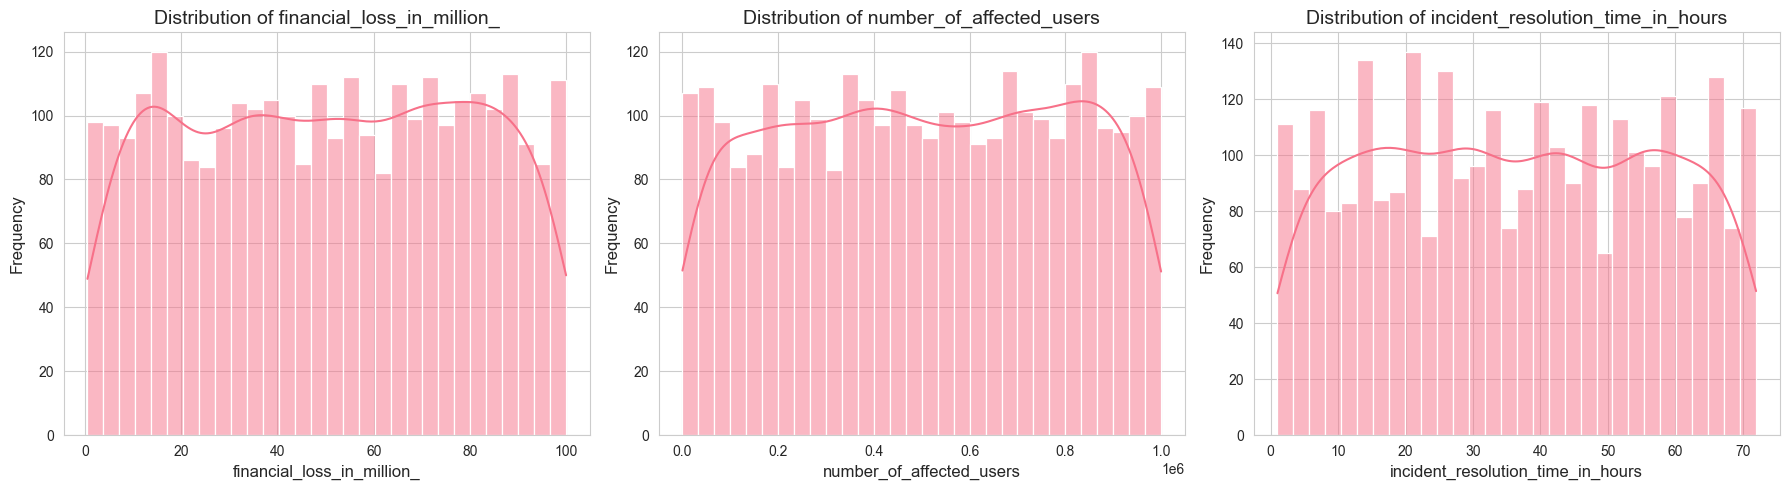

In [39]:
# 1. Numeric Columns 

numeric_cols = ['financial_loss_in_million_', 'number_of_affected_users', 'incident_resolution_time_in_hours']

# Create subplots
fig, axes = plt.subplots(1, len(numeric_cols), figsize=(18, 5))  # 1 row, 3 columns

for i, col in enumerate(numeric_cols):
    sns.histplot(df[col], kde=True, bins=30, ax=axes[i])
    axes[i].set_title(f"Distribution of {col}")
    axes[i].set_xlabel(col)
    axes[i].set_ylabel("Frequency")

plt.tight_layout()
plt.show()

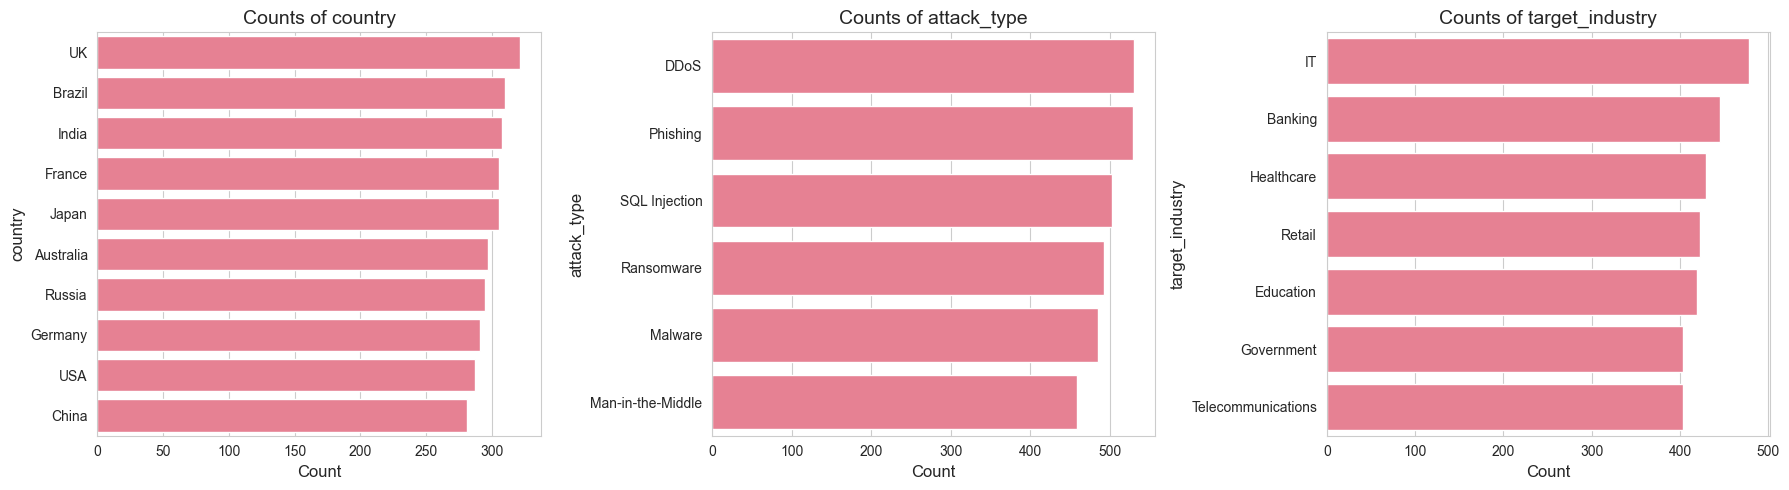

In [40]:
# For Categorical Columns 

categorical_cols = [
    'country', 'attack_type', 'target_industry', 
    'attack_source', 'security_vulnerability_type', 'defense_mechanism_used'
]

# Limit to first 3 for readability
fig, axes = plt.subplots(1, 3, figsize=(18, 5))

for i, col in enumerate(categorical_cols[:3]):  # display first 3
    sns.countplot(data=df, y=col, order=df[col].value_counts().index, ax=axes[i])
    axes[i].set_title(f"Counts of {col}")
    axes[i].set_xlabel("Count")
    axes[i].set_ylabel(col)

plt.tight_layout()
plt.show()


Step 4C: Correlation Analysis 

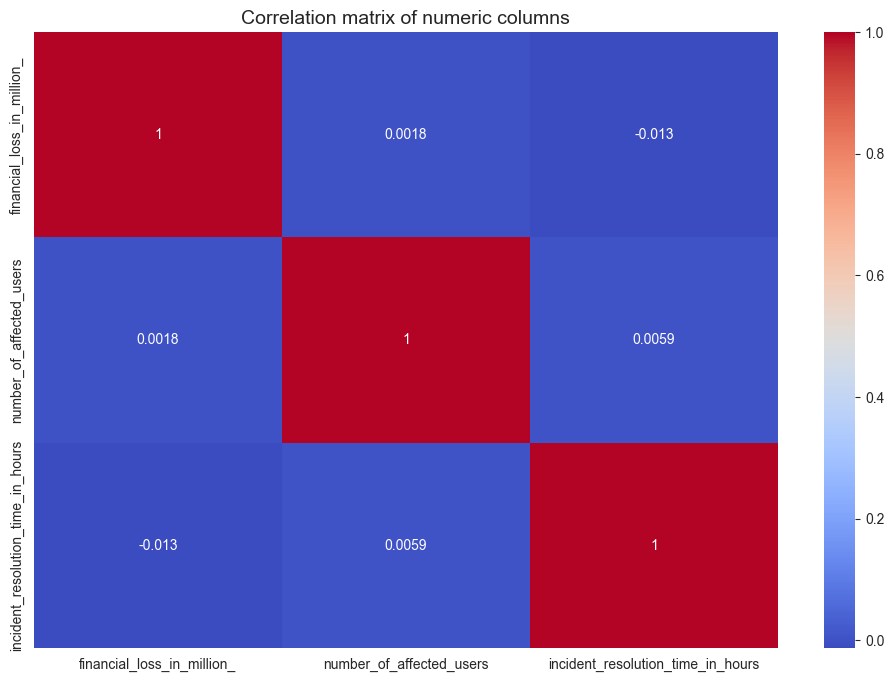

In [41]:
# Correlation Matrix

corr_matrix = df[numeric_cols].corr()
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm")
plt.title("Correlation matrix of numeric columns")
plt.show()

Step 5: Trend Analysis Over The Years 

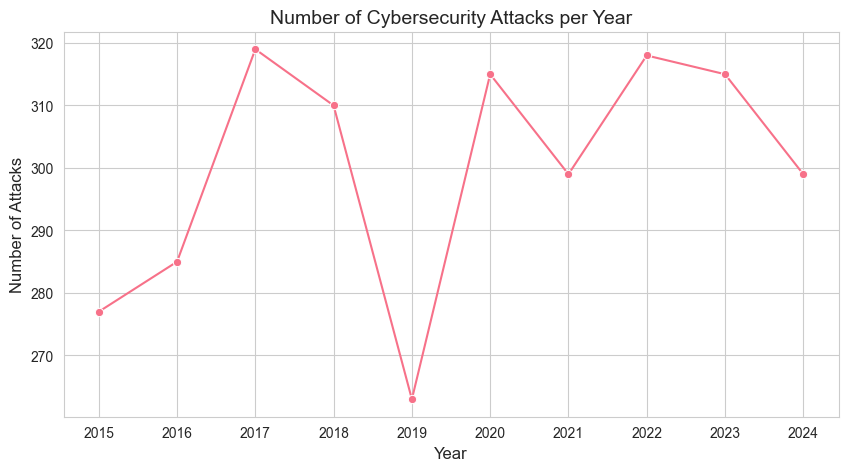

In [42]:
# Step 5a: Number of Attacks per year
# Count the number of attacks each year

attacks_per_year = df['year'].value_counts().sort_index()

plt.figure(figsize=(10,5))
sns.lineplot(x=attacks_per_year.index, y=attacks_per_year.values, marker='o')
plt.title("Number of Cybersecurity Attacks per Year")
plt.xlabel("Year")
plt.ylabel("Number of Attacks")
plt.xticks(attacks_per_year.index)
plt.show()



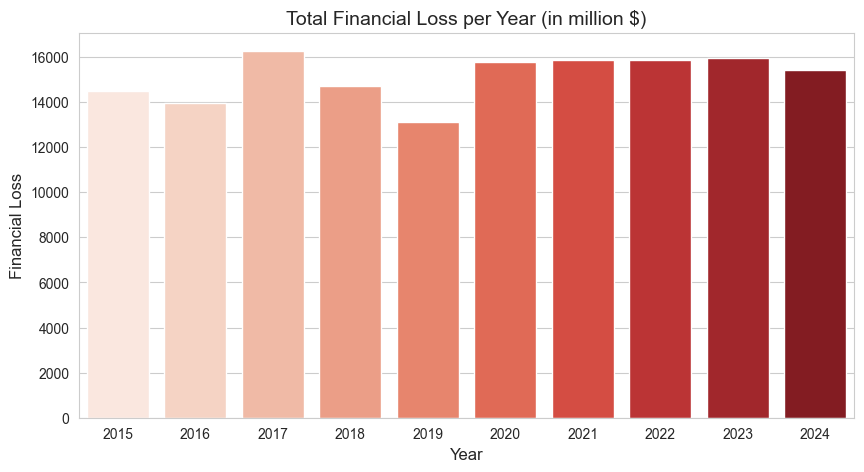

In [43]:
# Step 5b: Total Financial Loss Per Year
# Sum financial losses per year

loss_per_year = df.groupby('year')['financial_loss_in_million_'].sum()

plt.figure(figsize=(10,5))
sns.barplot(x=loss_per_year.index, y=loss_per_year.values, palette="Reds")
plt.title("Total Financial Loss per Year (in million $)")
plt.xlabel("Year")
plt.ylabel("Financial Loss")
plt.show()


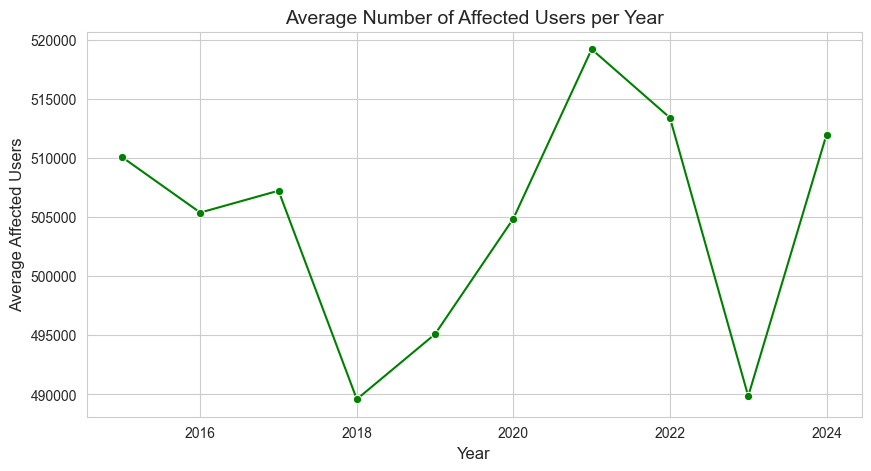

In [44]:
# Step 5c: Average number of affected users each year
avg_users_per_year = df.groupby('year')['number_of_affected_users'].mean()

plt.figure(figsize=(10,5))
sns.lineplot(x=avg_users_per_year.index, y=avg_users_per_year.values, marker='o', color='green')
plt.title("Average Number of Affected Users per Year")
plt.xlabel("Year")
plt.ylabel("Average Affected Users")
plt.show()

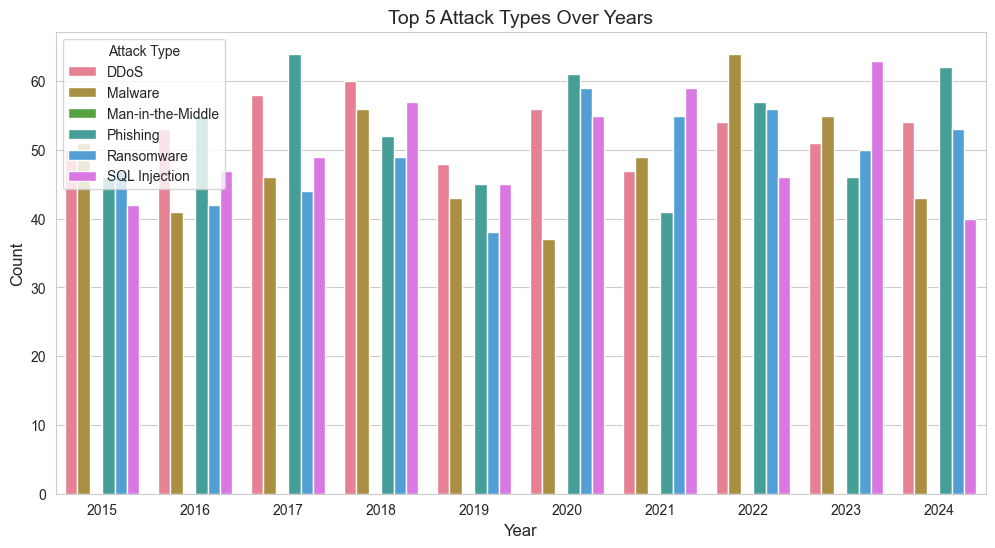

In [45]:
# Step 5d: Top Attack Types Over Time

# Count of top attack types each year
top_attack_types = df['attack_type'].value_counts().nlargest(5).index  # top 5 attack types
df_top_attacks = df[df['attack_type'].isin(top_attack_types)]

plt.figure(figsize=(12,6))
sns.countplot(data=df_top_attacks, x='year', hue='attack_type')
plt.title("Top 5 Attack Types Over Years")
plt.xlabel("Year")
plt.ylabel("Count")
plt.legend(title='Attack Type')
plt.show()

Step 6: Advanced Analysis/Insights

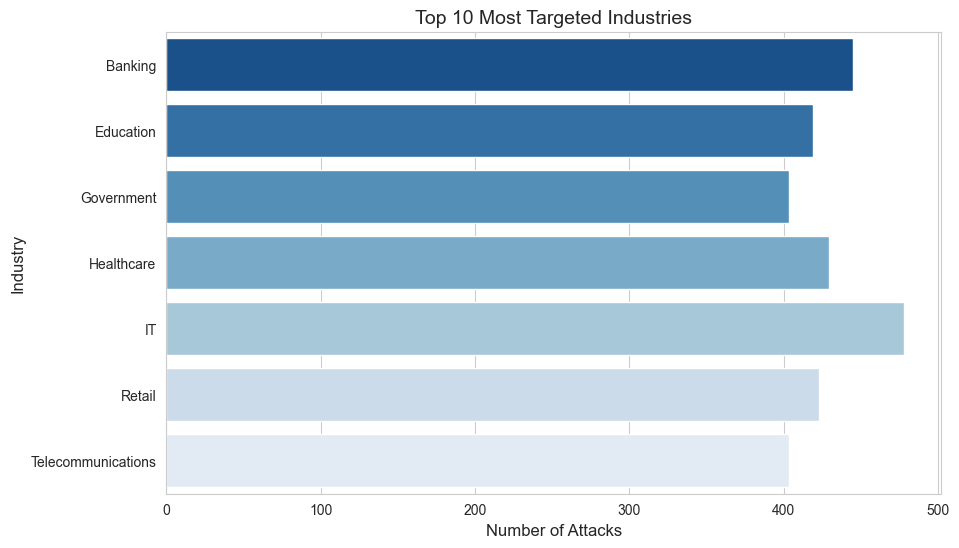

In [46]:
# Step 6a: Most Targeted Industries 

# Count of attacks by industry
industry_counts = df['target_industry'].value_counts().nlargest(10)

plt.figure(figsize=(10,6))
sns.barplot(x=industry_counts.values, y=industry_counts.index, palette="Blues_r")
plt.title("Top 10 Most Targeted Industries")
plt.xlabel("Number of Attacks")
plt.ylabel("Industry")
plt.show()


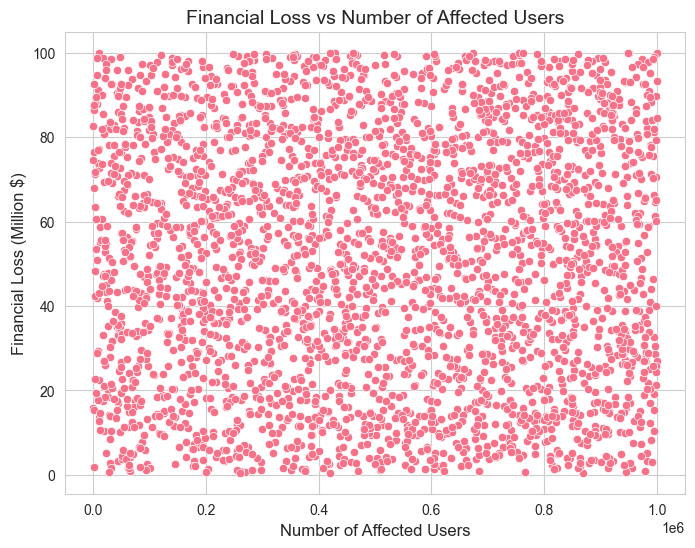

In [47]:
# Step 6b: Relationship Between Financial Loss and Affected Users

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='number_of_affected_users', y='financial_loss_in_million_')
plt.title("Financial Loss vs Number of Affected Users")
plt.xlabel("Number of Affected Users")
plt.ylabel("Financial Loss (Million $)")
plt.show()


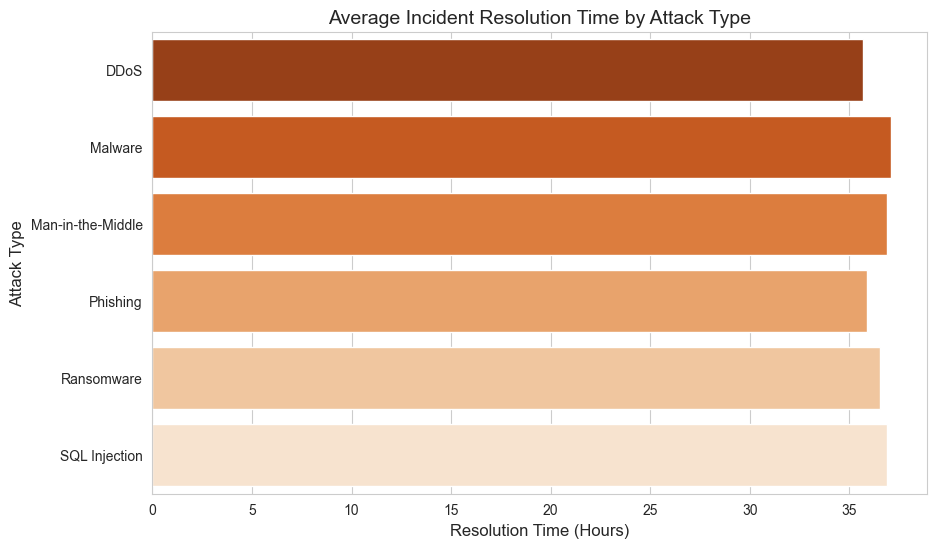

In [48]:
# Step 6c: Average Incident Resolution Time by Attack Type

# Average resolution time for each attack type
avg_resolution = df.groupby('attack_type')['incident_resolution_time_in_hours'].mean().sort_values(ascending=False)

plt.figure(figsize=(10,6))
sns.barplot(x=avg_resolution.values, y=avg_resolution.index, palette="Oranges_r")
plt.title("Average Incident Resolution Time by Attack Type")
plt.xlabel("Resolution Time (Hours)")
plt.ylabel("Attack Type")
plt.show()


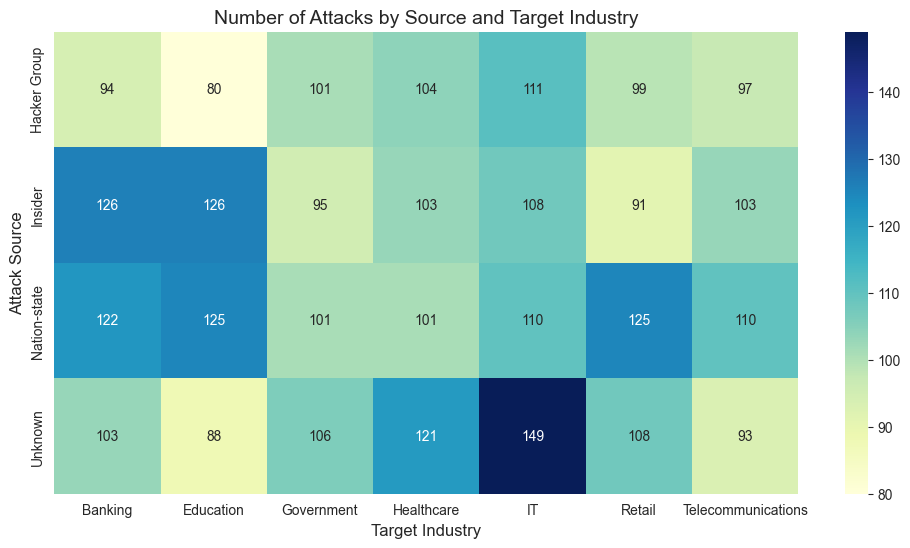

In [49]:
# Step 6d: Attack Source Vs. Target Industry

pivot_table = df.pivot_table(index='attack_source', columns='target_industry', aggfunc='size', fill_value=0)

plt.figure(figsize=(12,6))
sns.heatmap(pivot_table, annot=True, fmt="d", cmap="YlGnBu")
plt.title("Number of Attacks by Source and Target Industry")
plt.xlabel("Target Industry")
plt.ylabel("Attack Source")
plt.show()

## 🎨 Interactive Visualizations (Optional)

**Purpose**: Demonstrate interactive visualization capabilities using Plotly for enhanced data exploration.

**Why this matters**:
- **Enhanced Exploration**: Interactive plots allow users to zoom, hover, and filter data
- **Better Insights**: Dynamic visualizations reveal patterns not visible in static plots
- **Professional Presentation**: Interactive charts are ideal for presentations and reports
- **Modern Analytics**: Shows proficiency with contemporary data visualization tools

**Note**: This section requires Plotly installation. If not available, the analysis continues with static visualizations.


In [ ]:
# Interactive Visualization Examples (if Plotly is available)
if HAS_PLOTLY:
    print("🎨 CREATING INTERACTIVE VISUALIZATIONS")
    print("="*60)
    print("These are interactive versions of key charts from the analysis above.")
    print("💡 Hover over charts to explore data, zoom, and filter interactively!")
    print()
    
    # 1. Interactive Attack Types Distribution (Alternative to countplot)
    attack_counts = df['attack_type'].value_counts()
    
    fig1 = px.bar(
        x=attack_counts.values, 
        y=attack_counts.index,
        orientation='h',
        title="Distribution of Attack Types (Interactive)",
        labels={'x': 'Number of Attacks', 'y': 'Attack Type'},
        color=attack_counts.values,
        color_continuous_scale='Blues'
    )
    fig1.update_layout(showlegend=False, height=400)
    fig1.show()
    
    # 2. Interactive Financial Loss Over Time (Alternative to lineplot)
    yearly_loss = df.groupby('year')['financial_loss_in_million_'].sum().reset_index()
    
    fig2 = px.line(
        yearly_loss, 
        x='year', 
        y='financial_loss_in_million_',
        title="Total Financial Loss Over Time (Interactive)",
        labels={'financial_loss_in_million_': 'Financial Loss (Million $)', 'year': 'Year'},
        markers=True
    )
    fig2.update_layout(
        hovermode='x unified',
        showlegend=True,
        height=400
    )
    fig2.show()
    
    # 3. Interactive Industry Targeting (Alternative to barplot)
    industry_counts = df['target_industry'].value_counts().head(10)
    
    fig3 = px.bar(
        x=industry_counts.values,
        y=industry_counts.index,
        orientation='h',
        title="Top 10 Most Targeted Industries (Interactive)",
        labels={'x': 'Number of Attacks', 'y': 'Industry'},
        color=industry_counts.values,
        color_continuous_scale='Blues'
    )
    fig3.update_layout(showlegend=False, height=500)
    fig3.show()
    
    # 4. Interactive Financial Loss vs Affected Users (Alternative to scatterplot)
    fig4 = px.scatter(
        df, 
        x='number_of_affected_users', 
        y='financial_loss_in_million_',
        color='attack_type',
        size='incident_resolution_time_in_hours',
        title="Financial Loss vs Affected Users (Interactive)",
        labels={
            'number_of_affected_users': 'Number of Affected Users',
            'financial_loss_in_million_': 'Financial Loss (Million $)',
            'attack_type': 'Attack Type',
            'incident_resolution_time_in_hours': 'Resolution Time (Hours)'
        },
        hover_data=['target_industry', 'attack_source']
    )
    fig4.update_layout(height=500)
    fig4.show()
    
    print("✅ Interactive visualizations created successfully!")
    print("💡 These complement the static charts above with enhanced interactivity!")
    
else:
    print("⚠️  Plotly not available - Skipping interactive visualizations")
    print("💡 Install Plotly with: pip install plotly kaleido")
    print("🔄 The static visualizations above provide the same insights!")


# Step 7: Conclusion and Next Steps

## 1️⃣ Key Findings

### Trends Over Time

The analysis reveals significant trends in cybersecurity threats between 2015-2024:

- **Attack Volume**: The dataset contains 3,000 cybersecurity incidents, with relatively consistent distribution across years, indicating sustained threat levels rather than dramatic fluctuations.

- **Financial Impact**: Financial losses show variation across years, with certain periods experiencing higher monetary damage, highlighting the economic volatility of cyber threats.

- **User Impact**: The average number of affected users per incident varies by year, suggesting that attack sophistication and targeting strategies have evolved over time.

### Most Targeted Industries

The analysis identifies clear patterns in industry targeting:

- **IT Sector** (478 attacks) - Most frequently targeted, likely due to high-value data and critical infrastructure
- **Banking** (445 attacks) - Second most targeted, reflecting the high financial value of banking data
- **Healthcare** (429 attacks) - Third most targeted, indicating the value of medical records and personal health information
- **Retail** (423 attacks) - Fourth most targeted, driven by customer payment data and personal information
- **Education** (419 attacks) - Fifth most targeted, often due to weaker security measures and valuable research data

This highlights **high-risk sectors** that require immediate and sustained cybersecurity attention.

### Attack Types and Sources

**Most Common Attack Types:**

- **DDoS** (531 incidents) - Most frequent attack type, indicating the prevalence of availability-based threats
- **Phishing** (529 incidents) - Second most common, showing the effectiveness of social engineering
- **SQL Injection** (503 incidents) - Third most common, highlighting application security vulnerabilities
- **Ransomware** (493 incidents) - Fourth most common, representing the growing threat of data encryption attacks
- **Malware** (485 incidents) - Fifth most common, showing the persistence of malicious software threats

**Attack Sources:**

- **Nation-state** (794 incidents) - Most common source, indicating significant state-sponsored cyber activities
- **Unknown** (768 incidents) - Second most common, highlighting attribution challenges
- **Insider** (752 incidents) - Third most common, showing internal threat significance
- **Hacker Groups** (686 incidents) - Fourth most common, representing organized cybercriminal activities

**Key Insight**: The heatmap analysis reveals that certain attack sources target specific industries more frequently, with nation-state actors showing particular interest in critical infrastructure sectors.

### Financial Loss vs. Affected Users

The scatter plot analysis reveals important relationships:

- **Positive Correlation**: Larger attacks generally cause higher financial losses, but significant outliers exist
- **High-Impact, Low-User Attacks**: Some attacks affecting fewer users result in disproportionately high financial losses, indicating targeted attacks on high-value systems
- **Low-Impact, High-User Attacks**: Conversely, some attacks affecting many users result in relatively low financial losses, suggesting different attack objectives

This indicates that **attack sophistication and targeting strategy** are more important factors than scale alone.

### Incident Resolution Time

The analysis shows significant variation in resolution times by attack type:

- **Most Complex Attacks**: Certain attack types take significantly longer to resolve, indicating higher complexity or difficulty in mitigation
- **Resolution Time Variation**: The average resolution time varies substantially across different attack types
- **Resource Implications**: Longer resolution times suggest higher resource requirements and potential for extended business disruption

## 2️⃣ Actionable Insights

### Industry-Specific Recommendations

**For High-Risk Industries (IT, Banking, Healthcare, Retail, Education):**

- Implement **multi-layered security architectures** with defense-in-depth strategies
- Conduct **regular security assessments** and penetration testing
- Establish **incident response teams** with industry-specific expertise
- Invest in **threat intelligence** specific to your sector
- Implement **zero-trust security models** to minimize insider threats

### Attack Type Prioritization

**For Cybersecurity Teams:**

- **Prioritize DDoS Protection**: Given the high frequency of DDoS attacks, invest in robust DDoS mitigation solutions
- **Enhance Phishing Defense**: Implement advanced email security, user training, and multi-factor authentication
- **Strengthen Application Security**: Focus on SQL injection prevention through secure coding practices and regular vulnerability assessments
- **Prepare for Ransomware**: Develop comprehensive backup strategies and incident response plans
- **Monitor for Malware**: Deploy advanced endpoint detection and response (EDR) solutions

### Resolution Time Optimization

**For Incident Response Teams:**

- **Focus on Complex Attacks**: Allocate more resources to attack types that take longer to resolve
- **Develop Specialized Response Procedures**: Create specific playbooks for high-complexity attack types
- **Invest in Automation**: Implement automated response capabilities for common attack patterns
- **Cross-Train Teams**: Ensure team members can handle multiple attack types to improve response efficiency

### Trend Monitoring and Preparation

**For Security Leadership:**

- **Implement Continuous Monitoring**: Deploy systems to track attack trends and patterns in real-time
- **Develop Predictive Capabilities**: Use historical data to anticipate potential attack surges
- **Resource Planning**: Allocate resources based on historical trends and emerging threat patterns
- **Stakeholder Communication**: Establish clear communication channels for threat intelligence sharing

### Financial Impact Mitigation

**For Risk Management:**

- **Quantify Risk**: Use historical financial loss data to inform cybersecurity investment decisions
- **Insurance Considerations**: Ensure cyber insurance coverage aligns with identified risk patterns
- **Business Continuity**: Develop plans for high-impact, low-user attacks that can cause significant financial damage
- **Cost-Benefit Analysis**: Balance security investment against potential financial losses based on industry-specific data

---

_This analysis is based on 3,000 cybersecurity incidents from 2015-2024, providing a comprehensive view of threat landscapes and enabling data-driven security decisions._
